In [100]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
import seaborn as sns
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
import matplotlib as plt


# Data Cleaning for train dataset

In [138]:
df = pd.read_csv("Dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


check NAN and missing values

In [140]:
for element in df:
    print(element+" "+str(df[element].isnull().sum()))

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


delete non numeric and values which are unusable

In [142]:
del df['Cabin']

In [143]:
del df['Name']

In [144]:
del df['Ticket']

replace nan with median of total age

In [107]:
df['Age'] = df['Age'].fillna(df['Age'].dropna().median())

replace gender text by number 1 for male and 0 for female

In [108]:
liste_gender = []
for element in df['Sex']:
    if element == "male":
        liste_gender.append(1)
    else:
        liste_gender.append(0)
df['Sex']=liste_gender
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


One hot encoding for columns Embarked 

In [109]:
df_embarked = pd.get_dummies(df.Embarked, prefix='Embarked')
df_embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [110]:
df_work = pd.concat([df, df_embarked], axis=1, join='inner')

In [111]:
df_work.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,S,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,C,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,S,0,0,1


In [112]:
del df_work['Embarked']

# Correlation between variables

In [113]:
df_work.corr().round(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.00,-0.01,-0.04,0.04,0.03,-0.06,-0.00,0.01,-0.00,-0.03,0.02
Survived,-0.01,1.00,-0.34,-0.54,-0.06,-0.04,0.08,0.26,0.17,0.00,-0.16
Pclass,-0.04,-0.34,1.00,0.13,-0.34,0.08,0.02,-0.55,-0.24,0.22,0.08
Sex,0.04,-0.54,0.13,1.00,0.08,-0.11,-0.25,-0.18,-0.08,-0.07,0.13
Age,0.03,-0.06,-0.34,0.08,1.00,-0.23,-0.17,0.10,0.03,-0.03,-0.01
SibSp,-0.06,-0.04,0.08,-0.11,-0.23,1.00,0.41,0.16,-0.06,-0.03,0.07
Parch,-0.00,0.08,0.02,-0.25,-0.17,0.41,1.00,0.22,-0.01,-0.08,0.06
Fare,0.01,0.26,-0.55,-0.18,0.10,0.16,0.22,1.00,0.27,-0.12,-0.17
Embarked_C,-0.00,0.17,-0.24,-0.08,0.03,-0.06,-0.01,0.27,1.00,-0.15,-0.78
Embarked_Q,-0.03,0.00,0.22,-0.07,-0.03,-0.03,-0.08,-0.12,-0.15,1.00,-0.50


<AxesSubplot:>

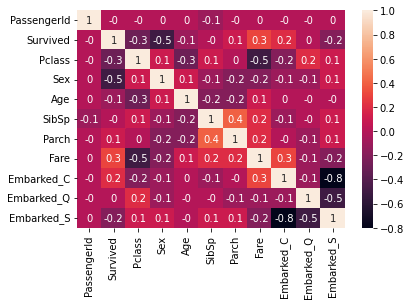

In [114]:
matrice_corr = df_work.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

# Separation of the dataset into train and test

In [115]:
X = df_work.loc[:, df_work.columns != 'Survived']
Y = df_work['Survived']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(445, 10)
(446, 10)
(445,)
(446,)


# Random Forest Classifier test scoring

In [18]:
rfc = RandomForestClassifier(random_state=1, n_estimators=10000, max_depth= 20)
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score : 0.8184


# Confusion matrix

In [19]:
confusion_matrix(Y_test, y_pred)

array([[244,  32],
       [ 49, 121]], dtype=int64)

<AxesSubplot:>

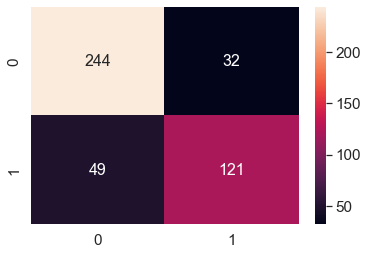

In [20]:
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')

# Grid Search

In [21]:
param_grid = { 
    'n_estimators': [200, 500, 700, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10, 12, 14],
    'criterion' :['gini', 'entropy']
}

In [22]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=10000,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10, 12, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 700, 1000]})

In [23]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 1000}

In [24]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth= 8, criterion= "entropy", max_features='auto')
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score : 0.8363


In [25]:
confusion_matrix(Y_test, y_pred)

array([[254,  22],
       [ 51, 119]], dtype=int64)

<AxesSubplot:>

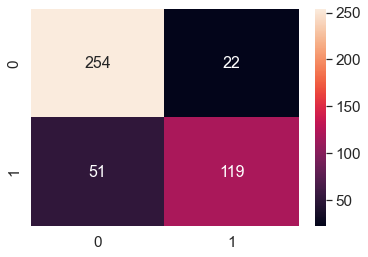

In [26]:
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')

# Data preprocessing for test dataset

In [117]:
df_test = pd.read_csv("Dataset/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [118]:
for element in df_test:
    print(element+" "+str(df_test[element].isnull().sum()))

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 86
SibSp 0
Parch 0
Ticket 0
Fare 1
Cabin 327
Embarked 0


In [119]:
del df_test['Cabin']
del df_test['Name']
del df_test['Ticket']

In [120]:
df_test['Fare'] = df_test['Fare'].fillna(0)

In [121]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].dropna().median())

In [122]:
df_embarked = pd.get_dummies(df_test.Embarked, prefix='Embarked')
df_embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [123]:
df_work_test = pd.concat([df_test, df_embarked], axis=1, join='inner')

In [124]:
df_work_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,Q,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,1


In [126]:
liste_gender = []
for element in df_work_test['Sex']:
    if element == "male":
        liste_gender.append(1)
    else:
        liste_gender.append(0)
df_work_test['Sex']=liste_gender
df_work_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,Q,0,1,0
1,893,3,0,47.0,1,0,7.0000,S,0,0,1
2,894,2,1,62.0,0,0,9.6875,Q,0,1,0
3,895,3,1,27.0,0,0,8.6625,S,0,0,1
4,896,3,0,22.0,1,1,12.2875,S,0,0,1


In [133]:
del df_work_test['Embarked']

# Separation of the dataset into train and test

In [134]:
X_train = df_work.loc[:, df_work.columns != 'Survived']
Y_train = df_work['Survived']
X_test = df_work_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(891, 10)
(418, 10)
(891,)


# Training with best RFC 

In [135]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth= 8, criterion= "entropy", max_features='auto')
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

# Submit

In [136]:
d = {'PassengerId':df_work_test['PassengerId'] , 'Survived': y_pred}
df_submission = pd.DataFrame(data=d)
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [137]:
df_submission.to_csv('submission.csv', index=False)

My rank for my first submit

![image.png](Image/score.PNG)